In [10]:
#importing essential packages
import os 
import glob
from zipfile import ZipFile
import datetime

import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 500)

import vaex

from tqdm import tqdm as tqdm
import time

In [11]:
#Defining the set of columns present in lowercase to match
columns = {  
    
    'vendorid',
    'lpep_pickup_datetime',
    'lpep_dropoff_datetime',
    'pickup_longitude',
    'pickup_latitude',
    'dropoff_longitude',
    'dropoff_latitude',
    'passenger_count',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'ehail_fee',
    'total_amount',
    'payment_type',
    'trip_type',
    
    'ratecodeid',
    'store_and_fwd_flag',
    'improvement_surcharge',
    'pulocationid',
    'dolocationid'
    }

#Renaming columns to lowercase
rename_dict = {
    'VendorID': 'vendor_id',
    'Lpep_pickup_datetime': 'lpep_pickup_datetime',
    'Passenger_count': 'passenger_count',
    'Trip_distance': 'trip_distance',
    'Fare_amount': 'fare_amount',
    'Extra': 'extra',
    'MTA_tax': 'mta_tax',
    'Tip_amount': 'tip_amount',
    'Tolls_amount': 'tolls_amount',
    'Ehail_fee': 'ehail_fee',
    'Total_amount': 'total_amount',
    'Payment_type': 'payment_type',
    'Store_and_fwd_flag': 'store_and_fwd_flag',
    
    'Trip_type': 'trip_type',  
    'Lpep_dropoff_datetime':  'lpep_dropoff_datetime',
    'Improvement_surcharge': 'improvement_surcharge',
    'PULocationID': 'pu_location_id',
    'DOLocationID': 'do_location_id',
    'RateCodeID': 'rate_code_id',
    'Pickup_longitude': 'pickup_longitude',
    'Pickup_latitude': 'pickup_latitude',
    'Dropoff_longitude': 'dropoff_longitude',
    'Dropoff_latitude': 'dropoff_latitude',
    
#     'congestion_surcharge': 'congestion_surcharge'

}

In [12]:
#Defining the zip file path
zip_list = './green.zip'

# Defining the output directory
output_dir = './hdf5/'

In [18]:

  
# opening the zip file in READ mode 
with ZipFile(zip_list, 'r') as zip: 
  
    # extracting all the files in greens folder
    print('Extracting all the files now...') 
    zip.extractall('greens') 
    print('Done!') 

Extracting all the files now...
Done!


In [14]:
#Defining the path of csv files
all_files=glob.glob('./greens/green/*.csv')



In [15]:
#Traversing all csv files 
for file in tqdm(all_files, leave=False, desc='Converting to hdf5...'):
    # Setting up the files, and directories
    output_file = file.split('/')[-1][:-3]+'hdf5'
    output = output_dir + output_file
    
    # Check if a converted file already exists: if it does skip it, otherwise read in the raw csv and convert it
    if (os.path.exists(output) and os.path.isfile(output)):
        pass
    else:
       #Reading the columns of all files
        columns_present = pd.read_csv(file, nrows = 1).columns
        Total_columns = columns_present.values
        # dfcolumns_set = set(dfcolumns_list)
        columns_set = {x.lower() for x in Total_columns}
        #Creating a list of missing columns
        final_columns = columns - columns_set
  # Importing the data into pandas 
        pandas_df = pd.read_csv(file, header = None, 
                                         skiprows = 1, 
                                         usecols = list(range(len(columns_present))), 
                                         names = columns_present)
#Adding the missing columns into the file 
        for add_column in final_columns:
            pandas_df[add_column] = np.nan
#         pandas_df = [pd.read_csv(file, 
#                                  sep=','
#                                  encoding='latin',
#                                  usecols=columns,
#                                  dtype=dtypes
#                                 )][0]
        # Rename some columns to match the more well known dataset from 
        # http://stat-computing.org/dataexpo/2009/the-data.html
        pandas_df.rename(columns=rename_dict, inplace=True)
        pandas_df=pandas_df.drop(['lpep_pickup_datetime','lpep_dropoff_datetime','store_and_fwd_flag','extra','mta_tax','tip_amount','tolls_amount','ehail_fee','payment_type','trip_type','improvement_surcharge'],axis=1)

        # Importing the data from pandas to vaex
        vaex_df = vaex.from_pandas(pandas_df, copy_index=False)
        
        # Export the data with vaex to hdf5
        vaex_df.export_hdf5(path=output, progress=False)

In [16]:
#importing other packages
import re
import glob
import vaex
import numpy as np
import matplotlib.pyplot as plt

def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    """ Turn a string into a list of string and number chunks.
        "z23a" -> ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

In [17]:
#Defining HDF5 file path
hdf5_list = glob.glob('.//hdf5//green//*.hdf5')
hdf5_list.sort(key=alphanum_key)
hdf5_list = np.array(hdf5_list)
print(hdf5_list)
#assert len(hdf5_list) == 372, "Incorrect number of files"

['.//hdf5//green\\green_tripdata_2013-08.hdf5'
 './/hdf5//green\\green_tripdata_2013-09.hdf5'
 './/hdf5//green\\green_tripdata_2013-10.hdf5'
 './/hdf5//green\\green_tripdata_2013-11.hdf5'
 './/hdf5//green\\green_tripdata_2013-12.hdf5'
 './/hdf5//green\\green_tripdata_2014-01.hdf5'
 './/hdf5//green\\green_tripdata_2014-02.hdf5'
 './/hdf5//green\\green_tripdata_2014-03.hdf5'
 './/hdf5//green\\green_tripdata_2014-04.hdf5'
 './/hdf5//green\\green_tripdata_2014-06.hdf5'
 './/hdf5//green\\green_tripdata_2014-07.hdf5'
 './/hdf5//green\\green_tripdata_2014-08.hdf5'
 './/hdf5//green\\green_tripdata_2014-09.hdf5'
 './/hdf5//green\\green_tripdata_2014-10.hdf5'
 './/hdf5//green\\green_tripdata_2014-11.hdf5'
 './/hdf5//green\\green_tripdata_2014-12.hdf5'
 './/hdf5//green\\green_tripdata_2015-01.hdf5'
 './/hdf5//green\\green_tripdata_2015-02.hdf5'
 './/hdf5//green\\green_tripdata_2015-03.hdf5'
 './/hdf5//green\\green_tripdata_2015-04.hdf5'
 './/hdf5//green\\green_tripdata_2015-05.hdf5'
 './/hdf5//gr

In [9]:
master_df = vaex.open_many(hdf5_list)

# exporting


In [10]:
# exporting
master_df.export_hdf5(path='./green_taxi1.hd5')

In [2]:
#opening the hdf5 file by vaex
df = vaex.open('./green_taxi1.hd5')


In [3]:
df.describe()

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance
dtype,float64,float64,float64,float64,float64,float64,float64
count,43878104,43878104,77837626,77423519,43878104,43878104,77837626
NA,33959522,33959522,0,414107,33959522,33959522,0
mean,40.68842211753776,-73.82305608844152,12.516811512727571,1.3746386546961267,40.687114399577226,-73.81727576367702,2.919056486897085
std,1.58026,2.86841,10.9789,1.05477,1.62586,2.95092,10.0524
min,0,-122.4,-890,0,-40.7583,-122.4,-20329.1
max,48.1195,0,10445.8,9,43.4159,73.9376,77843.8


In [4]:
#Converting vaex to pandas dataframe
pandas_df=df.to_pandas_df()

In [5]:
pandas_df

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance
0,0.0,0.0,21.25,1.0,0.0,0.0,0.00
1,0.0,0.0,74.50,2.0,0.0,0.0,0.00
2,0.0,0.0,1.00,1.0,0.0,0.0,0.00
3,0.0,0.0,3.25,1.0,0.0,0.0,0.00
4,0.0,0.0,8.50,1.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...
77837621,NaN,NaN,48.85,NaN,NaN,NaN,10.02
77837622,NaN,NaN,23.31,NaN,NaN,NaN,2.27
77837623,NaN,NaN,27.27,NaN,NaN,NaN,9.35
77837624,NaN,NaN,35.95,NaN,NaN,NaN,-7.16


In [6]:
import dask.dataframe as dd
#Converting pandas into dask
dask_df=dd.from_pandas(pandas_df,npartitions=2)
dask_df

INFO:MainThread:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:MainThread:numexpr.utils:NumExpr defaulting to 8 threads.


,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance
npartitions=2,,,,,,,
0,float64,float64,float64,float64,float64,float64,float64
38918813,...,...,...,...,...,...,...
77837625,...,...,...,...,...,...,...


In [7]:
#Creating Dictionary ans which will contain time taken for each task by each tool
ans = {'vaex':[], 'dask':[], 'pandas':[]}

# Query 1: Plotting against number of passengers

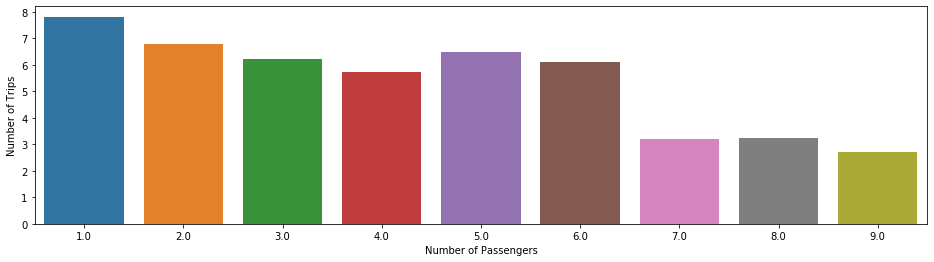

In [10]:
#Query 1: Plotting number of passengers vs trips for Vaex
import seaborn as sns
#Taking the start time 
start_time=time.time()
df=df[df.passenger_count>0]
num_passengers = df.passenger_count.value_counts()

plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#.bar(num_passengers.values,num_passengers.index)
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()
#Taking the end time
end_time=time.time()
#Calculating difference in time
time_difference=end_time-start_time
#Appending the dictionary
ans['vaex'].append(time_difference)


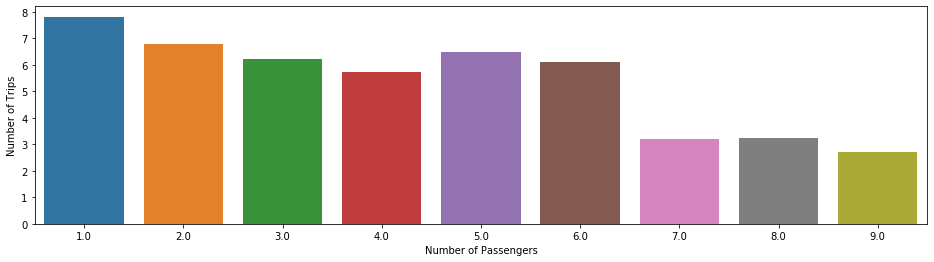

{'vaex': [0.7092101573944092], 'dask': [], 'pandas': [12.843101978302002]}

In [11]:
#Query 1 for Pandas
start_time=time.time()
pandas_df=pandas_df[pandas_df.passenger_count>0]
num_passengers = pandas_df.passenger_count.value_counts()

plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index, y=np.log10(num_passengers.values))
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#.bar(num_passengers.values,num_passengers.index)
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()
end_time=time.time()
time_diff=end_time-start_time
ans['pandas'].append(time_diff)
ans

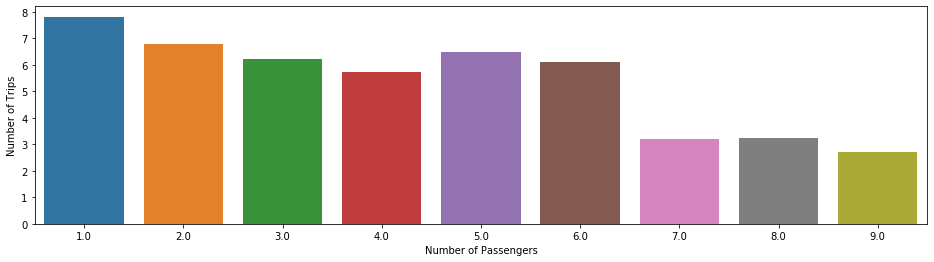

In [12]:
#Query 1 for Dask
start_time=time.time()
dask_df=dask_df[dask_df.passenger_count>0]
num_passengers = dask_df.passenger_count.value_counts()
plt.figure(figsize=(16, 4))
sns.barplot(x=num_passengers.index.compute(), y=np.log10(num_passengers.values.compute()))
#fig = plt.figure()
#ax = fig.add_axes([0,0,1,1])
#.bar(num_passengers.values,num_passengers.index)
plt.xlabel('Number of Passengers')
plt.ylabel('Number of Trips')
plt.show()
end_time=time.time()
time_diff=end_time-start_time
ans['dask'].append(time_diff)

# Query 2: Filtering of dataframe

In [13]:
#Query 2 for Vaex
start_time=time.time()
#Filtering df
df_filter=df[df.trip_distance<100 and df.trip_distance>0]
df_filter=df_filter[df_filter.passenger_count<10]
df_filter
end_time=time.time()
time_diff=end_time-start_time
ans['vaex'].append(time_diff)
ans

{'vaex': [0.7092101573944092, 0.08860206604003906],
 'dask': [26.272751092910767],
 'pandas': [12.843101978302002]}

In [14]:
#Query 2 for Pandas
start_time=time.time()
pandasdf=pandas_df[(pandas_df['trip_distance'] > 0) & (pandas_df['trip_distance'] < 100)]
pandasdf=pandasdf[pandasdf.passenger_count<10]
pandasdf
end_time=time.time()
time_diff=end_time-start_time
ans['pandas'].append(time_diff)


In [15]:
#Query 2 for Dask
start_time=time.time()
daskdf=dask_df[(dask_df['trip_distance'] > 0) & (dask_df['trip_distance'] < 100)]
daskdf=daskdf[daskdf.passenger_count<10]
daskdf.tail()
end_time=time.time()
time_diff=end_time-start_time
ans['dask'].append(time_diff)

In [16]:
ans

{'vaex': [0.7092101573944092, 0.08860206604003906],
 'dask': [26.272751092910767, 13.408276319503784],
 'pandas': [12.843101978302002, 27.387988328933716]}

<string>:1: RuntimeWarning: invalid value encountered in less
<string>:1: RuntimeWarning: invalid value encountered in greater


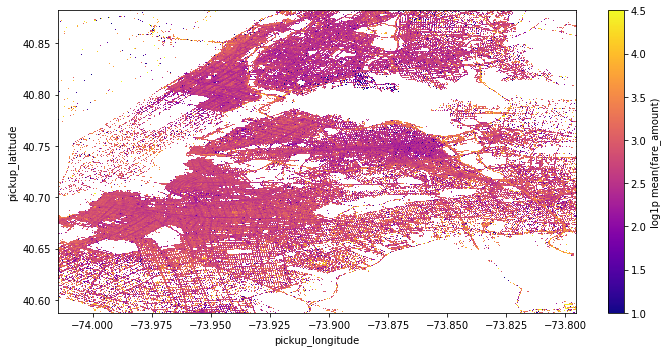

In [17]:
#Query 3 for Vaex
start_time=time.time()
plt.figure(figsize=(10, 5))
#Plotting heatmap wrt average of fare amount 

long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90


df_filter = df_filter[(df_filter.pickup_longitude > long_min)  & (df_filter.pickup_longitude < long_max) & \
                 (df_filter.pickup_latitude > lat_min)    & (df_filter.pickup_latitude < lat_max) ]

df_filter.plot('pickup_longitude','pickup_latitude',what='mean(fare_amount)',colormap='plasma',f='log1p',
               shape=512,colorbar=True,vmin=1, vmax=4.5)
plt.show()
end_time=time.time()
time_diff=end_time-start_time
ans['vaex'].append(time_diff)

In [18]:
pandasdf

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance
27,0.000000,0.000000,7.5,3.0,0.000000,0.000000,26.47
166,40.758209,-73.937485,3.5,1.0,40.758392,-73.937485,0.01
245,40.840988,-73.882095,14.0,5.0,40.806896,-73.879478,3.03
274,40.719810,-74.001541,49.5,1.0,40.859505,-73.887299,16.87
281,40.869423,-73.904640,11.0,5.0,40.860287,-73.920647,1.84
...,...,...,...,...,...,...,...
77746896,NaN,NaN,15.5,1.0,NaN,NaN,3.77
77746897,NaN,NaN,9.5,1.0,NaN,NaN,2.24
77746898,NaN,NaN,18.0,1.0,NaN,NaN,4.19
77746899,NaN,NaN,27.5,1.0,NaN,NaN,8.27


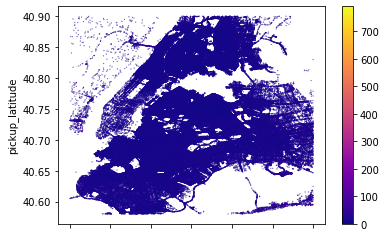

In [19]:
#Query 3 for pandas

start_time=time.time()


long_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90


pandasdf = pandasdf[(pandasdf.pickup_longitude > long_min)  & (pandasdf.pickup_longitude < long_max) & \
                 (pandasdf.pickup_latitude > lat_min)    & (pandasdf.pickup_latitude < lat_max) ]


pandas_heatmap = pandasdf.plot.hexbin(x='pickup_longitude',
                    y='pickup_latitude',
                    C='fare_amount',
                    gridsize=1000,
                    cmap="plasma")


end_time=time.time()
time_diff=end_time-start_time
ans['pandas'].append(time_diff)

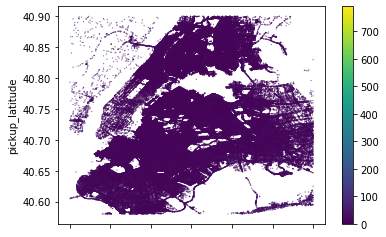

In [20]:
#Query 3 for dask
start_time=time.time()
daskdf = daskdf.compute()
ong_min = -74.05
long_max = -73.75
lat_min = 40.58
lat_max = 40.90

daskdf = daskdf[(daskdf.pickup_longitude > long_min)  & (daskdf.pickup_longitude < long_max) & \
                 (daskdf.pickup_latitude > lat_min)    & (daskdf.pickup_latitude < lat_max) ]

dask_heatmap = daskdf.plot.hexbin(x='pickup_longitude',
                    y='pickup_latitude',
                    C='fare_amount',
                    gridsize=1000,
                    cmap="viridis")
end_time=time.time()
time_diff=end_time-start_time
ans['dask'].append(time_diff)

## Query 4: Arc distance calculations and plotting

In [21]:
def arc_distance(theta_1,phi_1,theta_2,phi_2):

    temp= (np.sin((theta_2-theta_1)/2*np.pi/180)**2
          +np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180)
          *np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance =  2*np.arctan2(np.sqrt(temp),np.sqrt(1-temp))
    return distance * 3958.8
start_time=time.time()
df_filter['arc_distance']= arc_distance(df_filter.pickup_longitude,df_filter.pickup_latitude,df_filter.dropoff_longitude,df_filter.dropoff_latitude).jit_numba()
end_time=time.time()
time_diff=end_time-start_time
ans['vaex'].append(time_diff)

start_time=time.time()
pandasdf['arc_distance']= arc_distance(pandasdf.pickup_longitude,pandasdf.pickup_latitude,pandasdf.dropoff_longitude,pandasdf.dropoff_latitude)
end_time=time.time()
time_diff=end_time-start_time
ans['pandas'].append(time_diff)

start_time=time.time()
daskdf['arc_distance']= arc_distance(daskdf.pickup_longitude,daskdf.pickup_latitude,daskdf.dropoff_longitude,daskdf.dropoff_latitude)
end_time=time.time()
time_diff=end_time-start_time
ans['dask'].append(time_diff)

/Users/kashishdesai/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [22]:
df_filter

#,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance,arc_distance
0,40.758209228515625,-73.93748474121094,3.5,1.0,40.758392333984375,-73.93748474121094,0.01,0.0035004950113048682
1,40.84098815917969,-73.88209533691406,14.0,5.0,40.8068962097168,-73.87947845458984,3.03,0.678522685125074
2,40.719810485839844,-74.00154113769531,49.5,1.0,40.85950469970703,-73.88729858398438,16.87,8.332650303297815
3,40.869422912597656,-73.9046401977539,11.0,5.0,40.86028671264648,-73.92064666748048,1.84,1.1197004444008023
4,40.75222396850585,-73.98725891113281,29.0,5.0,40.83941650390625,-73.94114685058594,7.68,3.594520579279104
...,...,...,...,...,...,...,...,...
"43,084,385",40.70884704589844,-73.9094009399414,21.5,1.0,40.6973762512207,-73.9957733154297,5.18,5.971841314054017
"43,084,386",40.6951560974121,-73.97225189208984,8.5,1.0,40.69097137451172,-73.99163055419923,1.53,1.3413261211737761
"43,084,387",40.68282318115234,-73.96468353271484,7.0,1.0,40.67359161376953,-73.95021057128906,1.35,1.015412889572082
"43,084,388",40.77948760986328,-73.9559326171875,5.0,1.0,40.79080581665039,-73.95361328125,1.01,0.2690736245667897


In [23]:
pandasdf

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance,arc_distance
166,40.758209,-73.937485,3.5,1.0,40.758392,-73.937485,0.01,0.003500
245,40.840988,-73.882095,14.0,5.0,40.806896,-73.879478,3.03,0.678523
274,40.719810,-74.001541,49.5,1.0,40.859505,-73.887299,16.87,8.332650
281,40.869423,-73.904640,11.0,5.0,40.860287,-73.920647,1.84,1.119700
287,40.752224,-73.987259,29.0,5.0,40.839417,-73.941147,7.68,3.594521
...,...,...,...,...,...,...,...,...
43878099,40.708847,-73.909401,21.5,1.0,40.697376,-73.995773,5.18,5.971841
43878100,40.695156,-73.972252,8.5,1.0,40.690971,-73.991631,1.53,1.341326
43878101,40.682823,-73.964684,7.0,1.0,40.673592,-73.950211,1.35,1.015413
43878102,40.779488,-73.955933,5.0,1.0,40.790806,-73.953613,1.01,0.269074


In [24]:
daskdf

,dropoff_latitude,dropoff_longitude,fare_amount,passenger_count,pickup_latitude,pickup_longitude,trip_distance,arc_distance
166,40.758209,-73.937485,3.5,1.0,40.758392,-73.937485,0.01,0.003500
245,40.840988,-73.882095,14.0,5.0,40.806896,-73.879478,3.03,0.678523
274,40.719810,-74.001541,49.5,1.0,40.859505,-73.887299,16.87,8.332650
281,40.869423,-73.904640,11.0,5.0,40.860287,-73.920647,1.84,1.119700
287,40.752224,-73.987259,29.0,5.0,40.839417,-73.941147,7.68,3.594521
...,...,...,...,...,...,...,...,...
43878099,40.708847,-73.909401,21.5,1.0,40.697376,-73.995773,5.18,5.971841
43878100,40.695156,-73.972252,8.5,1.0,40.690971,-73.991631,1.53,1.341326
43878101,40.682823,-73.964684,7.0,1.0,40.673592,-73.950211,1.35,1.015413
43878102,40.779488,-73.955933,5.0,1.0,40.790806,-73.953613,1.01,0.269074


[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h
[########################################]:  100.00% elapsed time  :        0s =  0.0m =  0.0h
 

/Users/kashishdesai/opt/anaconda3/lib/python3.7/site-packages/vaex/viz/mpl.py:128: RuntimeWarning: divide by zero encountered in log10
  fgrid = f(grid)


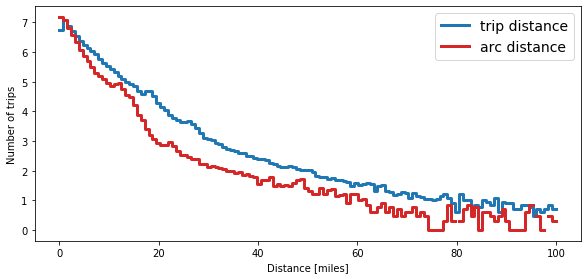

In [32]:
start_time=time.time()
plt.figure(figsize=(16, 4))

plt.subplot(121)
df_filter.plot1d('trip_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C0', 
                   label='trip distance', progress=True)
df_filter.plot1d('arc_distance', shape=128, limits=[0, 100], lw=3, f='log10', color='C3', 
                   label='arc distance', progress=True)
plt.legend(fontsize=14)
plt.xlabel('Distance [miles]')
plt.ylabel('Number of trips')
end_time=time.time()
time_diff=end_time-start_time
ans['vaex'].append(time_diff)


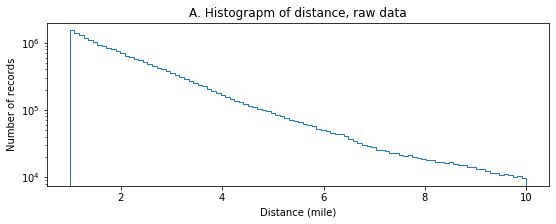

In [26]:
start_time=time.time()
fig, axs = plt.subplots(1,1)
fig.set_size_inches(9, 3)
fig.subplots_adjust(wspace=.5)
#daskd=daskdf.compute()

axs.hist(pandasdf['arc_distance'],bins=100, histtype = 'step', range=[1,10]);
axs.set_title('A. Histograpm of distance, raw data')
axs.set_xlabel('Distance (mile)')
axs.set_ylabel('Number of records')
axs.set_yscale('log')
end_time=time.time()
time_diff=end_time-start_time
ans['pandas'].append(time_diff)

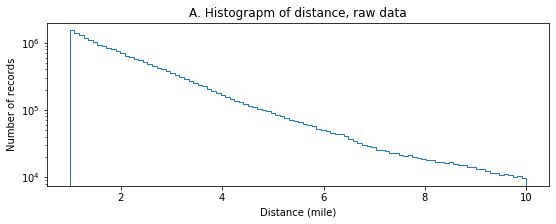

In [27]:
start_time=time.time()
fig, axs = plt.subplots(1,1)
fig.set_size_inches(9, 3)
fig.subplots_adjust(wspace=.5)
#daskd=daskdf.compute()

axs.hist(daskdf['arc_distance'],bins=100, histtype = 'step', range=[1,10]);
axs.set_title('A. Histograpm of distance, raw data')
axs.set_xlabel('Distance (mile)')
axs.set_ylabel('Number of records')
axs.set_yscale('log')
end_time=time.time()
time_diff=end_time-start_time
ans['dask'].append(time_diff)

In [33]:
#displaying the results of time duration
ans

{'vaex': [0.7092101573944092,
  0.08860206604003906,
  3.2217819690704346,
  0.6976759433746338,
  0.6925902366638184],
 'dask': [26.272751092910767,
  13.408276319503784,
  147.2009289264679,
  6.630040168762207,
  0.5171668529510498],
 'pandas': [12.843101978302002,
  27.387988328933716,
  125.79406094551086,
  10.25304126739502,
  0.5074810981750488]}

<Figure size 432x288 with 0 Axes>

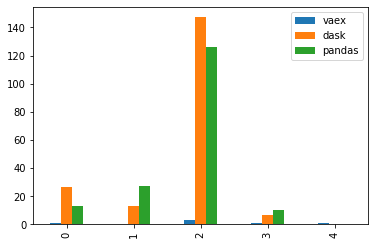

In [34]:
#Converting ans dictionary into dataframe and plotting
answers= pd.DataFrame.from_dict(ans)
plt.figure()
answers.plot(kind='bar')    

## Thus we can see that Vaex is much faster than Pandas and Dask